In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Car details v3.csv',header=0)

In [4]:
df.rename(columns = {'selling_price':'price', 'mileage':'consumption', 'max_power':'power', 'seller_type':'seller'}, inplace=True )

In [5]:
df.drop('torque', axis='columns', inplace=True) #torque is same as power in diffrent metric system

In [6]:
companyname = df['name'].apply(lambda x : x.split(' ')[0])
df.insert(1,"companyname",companyname)
df.drop(['name'],axis=1,inplace=True)
df.head()

,companyname,year,price,km_driven,fuel,seller,transmission,owner,consumption,engine,power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
df.companyname.unique()


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
df.loc[df.duplicated()]

,companyname,year,price,km_driven,fuel,seller,transmission,owner,consumption,engine,power,seats
291,Hyundai,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,5.0
296,Maruti,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,5.0
370,Jaguar,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,5.0
371,Lexus,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,5.0
372,Jaguar,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,5.0
7988,Maruti,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,5.0
8117,Maruti,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [9]:
df = df.drop_duplicates()
df.shape

(6907, 12)

In [10]:
df['companyname'].value_counts()


,count
companyname,
Maruti,2158
Hyundai,1263
Mahindra,719
Tata,646
Honda,362
Ford,360
Toyota,356
Chevrolet,216
Renault,205


In [11]:
df.companyname.unique()


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [12]:
print(df.loc[df['consumption'] == 0])

Empty DataFrame
Columns: [companyname, year, price, km_driven, fuel, seller, transmission, owner, consumption, engine, power, seats]
Index: []


In [13]:
(df == 0).sum()

,0
companyname,0
year,0
price,0
km_driven,0
fuel,0
seller,0
transmission,0
owner,0
consumption,0
engine,0


In [14]:
# ?df.isna()
co=pd.DataFrame({'engine':[np.NAN]})
co

,engine
0,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   6907 non-null   object 
 1   year          6907 non-null   int64  
 2   price         6907 non-null   int64  
 3   km_driven     6907 non-null   int64  
 4   fuel          6907 non-null   object 
 5   seller        6907 non-null   object 
 6   transmission  6907 non-null   object 
 7   owner         6907 non-null   object 
 8   consumption   6699 non-null   object 
 9   engine        6699 non-null   object 
 10  power         6702 non-null   object 
 11  seats         6699 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 701.5+ KB


In [16]:
df.describe()

,year,price,km_driven,seats
count,6907.000000,6.907000e+03,6.907000e+03,6699.000000
mean,2013.416679,5.174456e+05,7.400715e+04,5.434393
std,4.080794,5.203562e+05,5.836081e+04,0.984496
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.345000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [17]:
def replace_name(a,b):
  df.companyname.replace(a,b,inplace=True)

replace_name('Toyota','japan')
replace_name('Nissan','japan')
replace_name('Datsun','japan')
replace_name('Mitsubishi','japan')
replace_name('Isuzu','japan')
replace_name('Lexus','japan')
replace_name('Maruti','india')
replace_name('Mahindra','india')
replace_name('Ashok','india')
replace_name('Force','india')
replace_name('Tata','india')
replace_name('Ambassador','india')
replace_name('Honda','japan')
replace_name('Toyota','japan')
replace_name('Nissan','japan')
replace_name('Datsun','japan')
replace_name('Mitsubishi','japan')
replace_name('Isuzu','japan')
replace_name('Lexus','japan')
replace_name('Hyundai','korea')
replace_name('Kia','korea')
replace_name('Daewoo','korea')
replace_name('Ford','usa')
replace_name('Chevrolet','usa')
replace_name('Jeep','usa')
replace_name('Renault','france')
replace_name('Peugeot','france')
replace_name('Volkswagen','germany')
replace_name('BMW','germany')
replace_name('Mercedes-Benz','germany')
replace_name('Audi','germany')
replace_name('Volkswagen','germany')
replace_name('Opel','germany')
replace_name('Fiat','euro')
replace_name('Volvo','euro')
replace_name('Jaguar','euro')
replace_name('MG','euro')
replace_name('Land','euro')
replace_name('Skoda','euro')

<ipython-input-17-ed59997deb15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.companyname.replace(a,b,inplace=True)
<ipython-input-17-ed59997deb15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.companyname.replace(a,b,inplace=True)


In [18]:
df.rename(columns = {'companyname':'companyhome'}, inplace=True )

<ipython-input-18-8e7d7659c214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'companyname':'companyhome'}, inplace=True )


In [19]:
df['companyhome'].value_counts()


,count
companyhome,
india,3532
korea,1269
japan,864
usa,598
germany,301
france,206
euro,137


In [20]:
# df.replace(to_replace =['Nissan', 'Skoda','Datsun','BMW','Mercedes-Benz','Fiat','Audi','Jeep','Mitsubishi','Volvo','Jaguar',
#                         'Ambassador','Force','Isuzu','Daewoo','MG','Land','Kia','Peugeot','Opel','Ashok','Lexus'], value ='other',inplace=True)

In [21]:
df['companyhome'].value_counts()

,count
companyhome,
india,3532
korea,1269
japan,864
usa,598
germany,301
france,206
euro,137


In [22]:

df['consumption'] = df['consumption'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x) #drop kmpl and convert consumption type to floats

df['engine'] = df['engine'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x)#drop cc and convert engine type to float
df['engine']=df['engine'].replace(".0","")

#drop bhp and convert power to float
df['power'].replace(' bhp',np.nan, inplace=True)
df['power'] = df['power'].apply(lambda y: str(y) if pd.notnull(y) else y)
df['power'] = df['power'].apply(lambda y: float(y.split()[0]) if pd.notnull(y) else y)

df['owner'] = df['owner'].apply(lambda z: (str(z).split()[0]) if pd.notnull(z) else z)# drop owner and convert owner type to string
df['price'] = df['price'] // 100
df['year']=df['year'].replace(".0","")

<ipython-input-22-af0535d57175>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['power'].replace(' bhp',np.nan, inplace=True)


In [23]:
df=df[['price','companyhome','year','engine','power','seats','km_driven','fuel','seller','transmission','owner','consumption']]

In [24]:
df.head()

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
0,4500,india,2014,1248.0,74.00,5.0,145500,Diesel,Individual,Manual,First,23.40
1,3700,euro,2014,1498.0,103.52,5.0,120000,Diesel,Individual,Manual,Second,21.14
2,1580,japan,2006,1497.0,78.00,5.0,140000,Petrol,Individual,Manual,Third,17.70
3,2250,korea,2010,1396.0,90.00,5.0,127000,Diesel,Individual,Manual,First,23.00
4,1300,india,2007,1298.0,88.20,5.0,120000,Petrol,Individual,Manual,First,16.10


In [25]:
df.describe()

,price,year,engine,power,seats,km_driven,consumption
count,6907.000000,6907.000000,6699.000000,6701.000000,6699.000000,6.907000e+03,6699.000000
mean,5174.413928,2013.416679,1431.047320,87.748026,5.434393,7.400715e+04,19.464360
std,5203.567197,4.080794,493.365463,31.785609,0.984496,5.836081e+04,4.050454
min,299.000000,1983.000000,624.000000,0.000000,2.000000,1.000000e+00,0.000000
25%,2500.000000,2011.000000,1197.000000,67.100000,5.000000,4.000000e+04,16.800000
50%,4000.000000,2014.000000,1248.000000,81.830000,5.000000,7.000000e+04,19.440000
75%,6345.000000,2017.000000,1498.000000,100.000000,5.000000,1.000000e+05,22.500000
max,100000.000000,2020.000000,3604.000000,400.000000,14.000000,2.360457e+06,42.000000


In [26]:
(df == 0).sum()

,0
price,0
companyhome,0
year,0
engine,0
power,3
seats,0
km_driven,0
fuel,0
seller,0
transmission,0


In [27]:
print(df.loc[df['consumption'] == 0])

      price companyhome  year  engine   power  seats  km_driven    fuel  \
644    1350       india  2009  1172.0   65.00    5.0      28900  Petrol   
785    1200       korea  2009  1086.0   62.00    5.0      90000  Petrol   
1649   1050       korea  2008  1086.0   62.00    5.0     128000  Petrol   
1676  17000     germany  2011  2987.0  165.00    5.0     110000  Diesel   
2137  16500        euro  2013  2179.0  115.00    5.0      64788  Diesel   
2366   1100       korea  2010  1086.0   62.10    5.0      80000  Petrol   
2725   1840       korea  2013  1086.0   62.10    5.0      15000  Petrol   
5276   1750       korea  2008  1086.0   62.00    5.0      40000  Petrol   
5843   5740     germany  2014  1197.0  103.25    5.0      28080  Petrol   
5846   5750     germany  2014  1197.0  103.25    5.0      28100  Petrol   
5900   6790       india  2020  2523.0   70.00    2.0       5000  Diesel   
6534   1500       korea  2010  1086.0   62.00    5.0     110000  Petrol   
6629   7220       india  

In [28]:
print(df.loc[df['power'] == 0])

      price companyhome  year  engine  power  seats  km_driven    fuel  \
575    2049       india  2011     NaN    0.0    NaN      97500  Petrol   
1442   5890       india  2017     NaN    0.0    NaN      41232  Diesel   
2549   2400       india  2012     NaN    0.0    NaN      70000  Diesel   

          seller transmission  owner  consumption  
575   Individual       Manual  First          NaN  
1442      Dealer       Manual  First          NaN  
2549  Individual       Manual  First          NaN  


In [29]:
df.shape

(6907, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         6907 non-null   int64  
 1   companyhome   6907 non-null   object 
 2   year          6907 non-null   int64  
 3   engine        6699 non-null   float64
 4   power         6701 non-null   float64
 5   seats         6699 non-null   float64
 6   km_driven     6907 non-null   int64  
 7   fuel          6907 non-null   object 
 8   seller        6907 non-null   object 
 9   transmission  6907 non-null   object 
 10  owner         6907 non-null   object 
 11  consumption   6699 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 701.5+ KB


In [31]:
df.isna().any()

,0
price,False
companyhome,False
year,False
engine,True
power,True
seats,True
km_driven,False
fuel,False
seller,False
transmission,False


In [32]:
df.iloc[10:20]

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
10,5000,france,2014,1461.0,108.45,5.0,68000,Diesel,Individual,Manual,Second,19.01
11,920,india,2005,993.0,60.00,5.0,100000,Petrol,Individual,Manual,Second,17.30
12,2800,india,2009,1248.0,73.90,5.0,140000,Diesel,Individual,Manual,Second,19.30
13,2000,india,2007,NaN,NaN,NaN,80000,Petrol,Individual,Manual,Second,NaN
14,1800,india,2009,1061.0,67.00,5.0,90000,Petrol,Individual,Manual,Second,18.90
15,4000,india,2016,1198.0,82.00,5.0,40000,Petrol,Individual,Manual,First,18.15
16,7780,india,2016,1248.0,88.50,7.0,70000,Diesel,Individual,Manual,Second,24.52
17,5000,korea,2012,1396.0,90.00,5.0,53000,Diesel,Individual,Manual,Second,23.00
18,1500,india,2002,796.0,46.30,5.0,80000,Petrol,Individual,Manual,Second,19.70
19,6800,korea,2016,1396.0,88.73,5.0,100000,Diesel,Individual,Manual,First,22.54


In [33]:
mv=df.consumption.mean()
df.consumption=df.consumption.fillna(mv)
df.consumption=df.consumption.replace(0, mv)

In [34]:
mv=df.engine.mean()
df.engine=df.engine.fillna(mv)

In [35]:
mv=df.power.mean()
df.power=df.power.fillna(mv)
df.power=df.power.replace(0,mv)

In [36]:
mv=df.seats.mean()
df.seats=df.seats.fillna(mv)


In [37]:
# df.dropna()

In [38]:
df['seats']=df['seats'].astype(int)

In [39]:
df.iloc[10:20]

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
10,5000,france,2014,1461.00000,108.450000,5,68000,Diesel,Individual,Manual,Second,19.01000
11,920,india,2005,993.00000,60.000000,5,100000,Petrol,Individual,Manual,Second,17.30000
12,2800,india,2009,1248.00000,73.900000,5,140000,Diesel,Individual,Manual,Second,19.30000
13,2000,india,2007,1431.04732,87.748026,5,80000,Petrol,Individual,Manual,Second,19.46436
14,1800,india,2009,1061.00000,67.000000,5,90000,Petrol,Individual,Manual,Second,18.90000
15,4000,india,2016,1198.00000,82.000000,5,40000,Petrol,Individual,Manual,First,18.15000
16,7780,india,2016,1248.00000,88.500000,7,70000,Diesel,Individual,Manual,Second,24.52000
17,5000,korea,2012,1396.00000,90.000000,5,53000,Diesel,Individual,Manual,Second,23.00000
18,1500,india,2002,796.00000,46.300000,5,80000,Petrol,Individual,Manual,Second,19.70000
19,6800,korea,2016,1396.00000,88.730000,5,100000,Diesel,Individual,Manual,First,22.54000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         6907 non-null   int64  
 1   companyhome   6907 non-null   object 
 2   year          6907 non-null   int64  
 3   engine        6907 non-null   float64
 4   power         6907 non-null   float64
 5   seats         6907 non-null   int64  
 6   km_driven     6907 non-null   int64  
 7   fuel          6907 non-null   object 
 8   seller        6907 non-null   object 
 9   transmission  6907 non-null   object 
 10  owner         6907 non-null   object 
 11  consumption   6907 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 701.5+ KB


In [41]:
df.describe()

,price,year,engine,power,seats,km_driven,consumption
count,6907.000000,6907.000000,6907.000000,6907.000000,6907.000000,6.907000e+03,6907.000000
mean,5174.413928,2013.416679,1431.047320,87.786139,5.421312,7.400715e+04,19.506631
std,5203.567197,4.080794,485.878888,31.254465,0.972395,5.836081e+04,3.884245
min,299.000000,1983.000000,624.000000,32.800000,2.000000,1.000000e+00,9.000000
25%,2500.000000,2011.000000,1197.000000,68.000000,5.000000,4.000000e+04,17.000000
50%,4000.000000,2014.000000,1248.000000,81.860000,5.000000,7.000000e+04,19.464360
75%,6345.000000,2017.000000,1498.000000,99.000000,5.000000,1.000000e+05,22.320000
max,100000.000000,2020.000000,3604.000000,400.000000,14.000000,2.360457e+06,42.000000


In [42]:
df.isna().any()

,0
price,False
companyhome,False
year,False
engine,False
power,False
seats,False
km_driven,False
fuel,False
seller,False
transmission,False


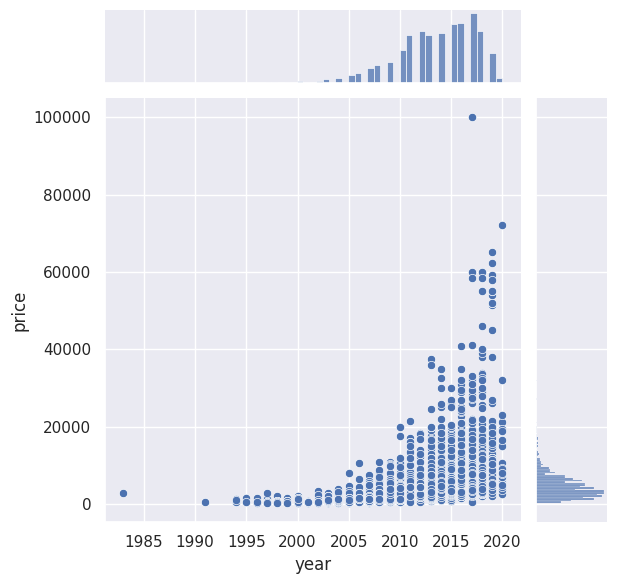

In [43]:
sns.jointplot(x='year',y='price',data=df)

In [44]:
lv=np.percentile(df.year,[1])[0]
lv

2001.0

In [45]:
df[df.year<0.996*lv]

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
316,3000,india,1983,1431.04732,87.748026,5,10000,Diesel,Individual,Manual,Third,19.46436
5322,550,india,1991,1431.04732,87.748026,5,120000,LPG,Individual,Manual,Second,19.46436


In [46]:
lb=0.996*lv
lb

1992.996

In [47]:
df.year[(df.year<0.996*lv)]=0.996*lv

<ipython-input-47-1a978d9630b9>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.year[(df.year<0.996*lv)]=0.996*lv
<ipython-input-47-1a978d9630b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

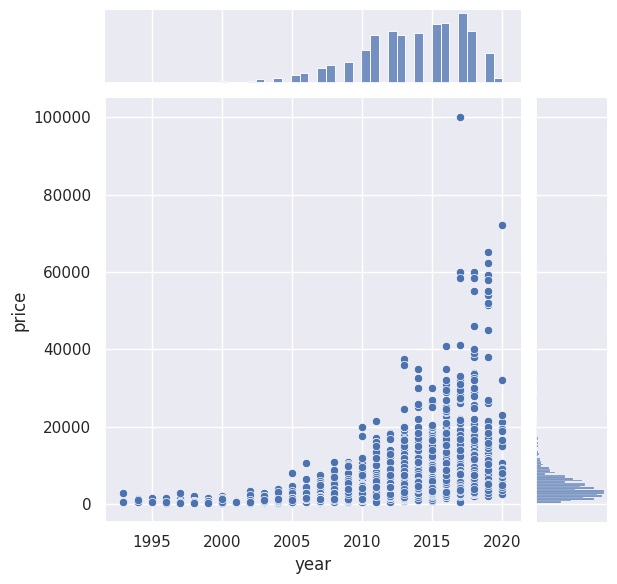

In [48]:
sns.jointplot(x='year',y='price',data=df)

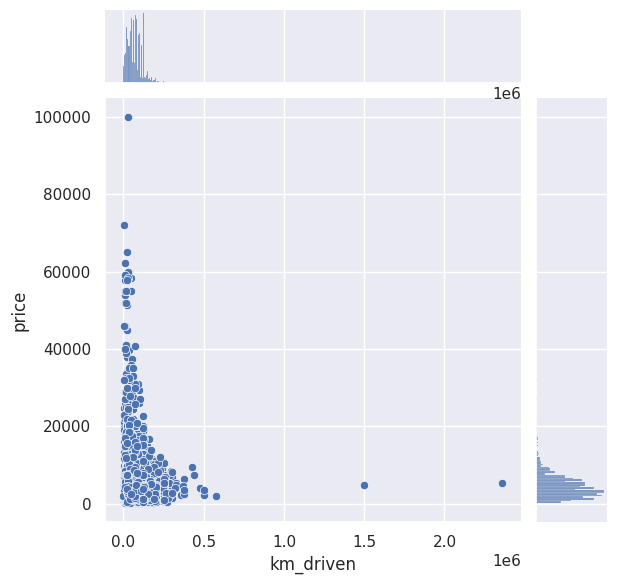

In [49]:
sns.jointplot(x='km_driven',y='price',data=df)

In [50]:
uv=np.percentile(df.km_driven,[99])[0]
uv

238970.2199999968

In [51]:
df[(df.km_driven>uv)]

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
394,2500,japan,2005.0,2494.0,102.00,8,240000,Diesel,Individual,Manual,Third,12.80
401,950,india,2012.0,1405.0,70.00,5,265000,Diesel,Individual,Manual,Second,17.00
461,7300,japan,2012.0,2494.0,100.00,7,250000,Diesel,Individual,Manual,First,12.99
886,3200,india,2010.0,2523.0,63.00,7,300000,Diesel,Individual,Manual,Third,13.60
998,2200,india,2012.0,998.0,67.10,5,360003,Petrol,Individual,Manual,Second,18.90
...,...,...,...,...,...,...,...,...,...,...,...,...
7631,6500,usa,2011.0,2499.0,80.00,7,250000,Diesel,Individual,Manual,Second,14.80
7633,2850,usa,2010.0,2499.0,80.00,9,265000,Diesel,Individual,Manual,Fourth,14.80
7645,1100,india,2014.0,1405.0,70.00,5,250000,Diesel,Individual,Manual,Second,19.10
8030,2750,india,2014.0,2956.0,83.83,7,300000,Diesel,Individual,Manual,First,15.30


In [52]:
ub=1.1*uv
ub

262867.2419999965

In [53]:
df.km_driven[(df.km_driven>1.1*uv)]=1.1*uv

<ipython-input-53-9048480e7421>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.km_driven[(df.km_driven>1.1*uv)]=1.1*uv
<ipython-input-53-9048480e7421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

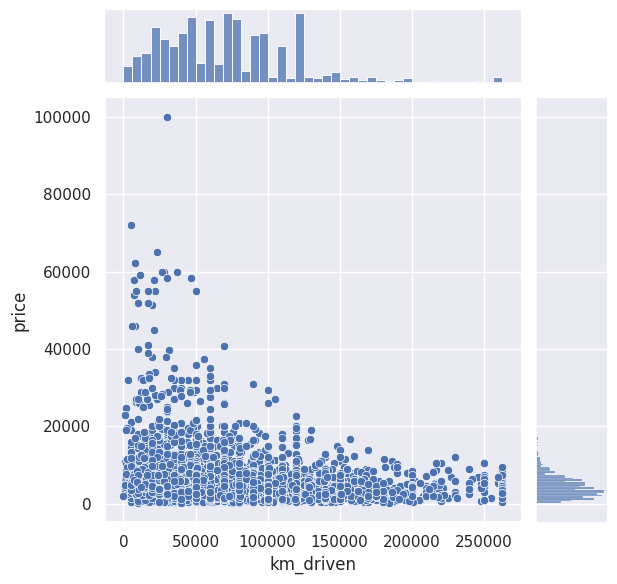

In [54]:
sns.jointplot(x='km_driven',y='price',data=df)

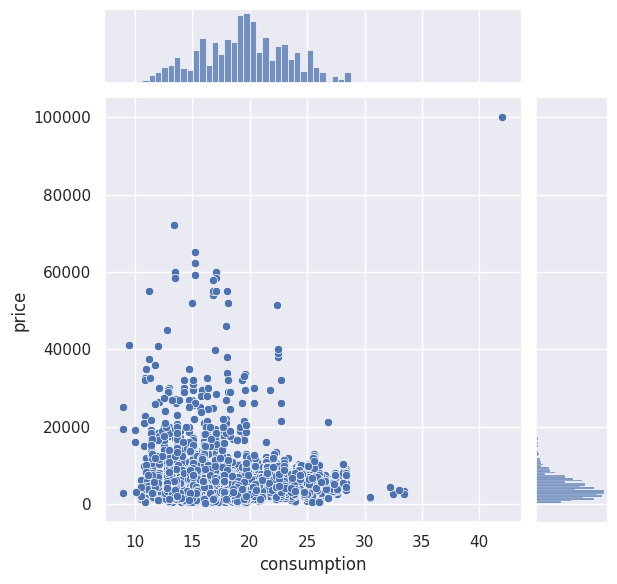

In [55]:
sns.jointplot(x='consumption',y='price',data=df)

In [56]:
uv=np.percentile(df.consumption,[99.9])[0]
uv

30.46

In [57]:
df[(df.consumption>uv)]

,price,companyhome,year,engine,power,seats,km_driven,fuel,seller,transmission,owner,consumption
35,3300,india,2019.0,796.0,40.30,4,10000.0,CNG,Individual,Manual,Second,33.44
170,100000,euro,2017.0,1969.0,400.00,4,30000.0,Petrol,Individual,Automatic,First,42.00
2312,2700,india,2013.0,998.0,58.33,5,80000.0,CNG,Individual,Manual,Second,32.52
3908,2600,india,2017.0,796.0,40.30,4,67000.0,CNG,Individual,Manual,First,33.44
5789,4300,india,2019.0,998.0,58.30,4,20000.0,CNG,Individual,Manual,First,32.26
5815,3700,india,2020.0,796.0,47.30,5,16000.0,CNG,Individual,Manual,First,33.00


In [58]:
ub=1.2*uv
ub

36.552

In [59]:
df.consumption[(df.consumption>1.2*uv)]=1.2*uv

<ipython-input-59-059ddaba5e2e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.consumption[(df.consumption>1.2*uv)]=1.2*uv
<ipython-input-59-059ddaba5e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

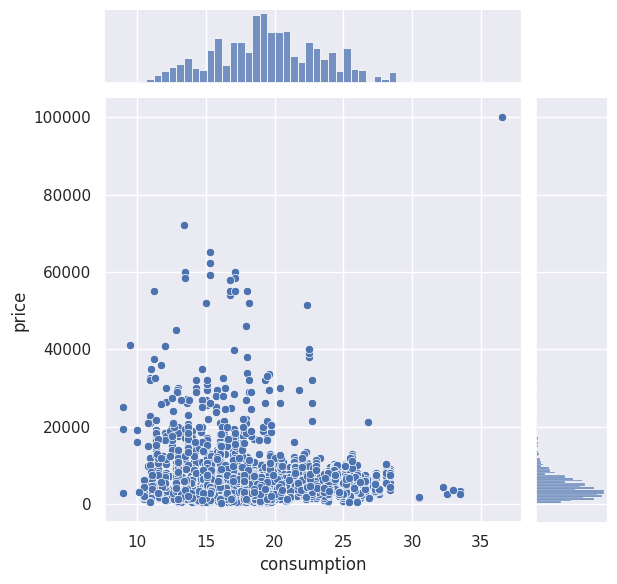

In [60]:
sns.jointplot(x='consumption',y='price',data=df)

In [ ]:
sns.jointplot(x='engine',y='price',data=df)

In [ ]:
uv=np.percentile(df.engine,[99.9])[0]
uv

In [ ]:
df[(df.engine>uv)]

In [ ]:
ub=0.999*uv
ub

In [ ]:
df.engine[(df.engine>uv)]=0.999*uv

In [ ]:
sns.jointplot(x='engine',y='price',data=df)

In [ ]:
sns.jointplot(x='power',y='price',data=df)

In [ ]:
uv=np.percentile(df.power,[99])[0]
uv

In [ ]:
df[(df.power>uv)]

In [ ]:
ub=1.5*uv
ub

In [ ]:
df.power[(df.power>1.5*uv)]=1.5*uv

In [ ]:
sns.jointplot(x='power',y='price',data=df)

In [ ]:
sns.jointplot(x='seats',y='price',data=df)

In [ ]:
uv=np.percentile(df.seats,[98])[0]
uv

In [ ]:
df[(df.seats>uv)]

In [ ]:
ub=1.1*uv
ub

In [ ]:
df.seats[(df.seats>uv)]=1.1*uv

In [ ]:
sns.jointplot(x='seats',y='price',data=df)

In [ ]:
plt.figure(figsize=(15,6)) #  creates a figure 20 inch wide, 6 inch high
ax = sns.countplot(x='companyhome', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=14) #Rotate the labels and increase the font size
plt.xlabel('companyhome',fontsize=17)# increase the font size on the x axis of countplot
plt.ylabel('count',fontsize=17)# increase the font size on the y axis of countplot
plt.show()

In [ ]:
sns.countplot(x='fuel',data=df)
plt.xlabel('fuel',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
sns.countplot(x='seller',data=df)
plt.xlabel('seller',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
sns.countplot(x='transmission',data=df)
plt.xlabel('transmission',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
ax = sns.countplot(x="owner", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=14)
plt.xlabel('owner',fontsize=17)
plt.ylabel('count',fontsize=17)
plt.show()

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
del df['fuel_LPG']

In [ ]:
del df['seller_Trustmark Dealer']

In [ ]:
del df['transmission_Automatic']

In [ ]:
del df['owner_Test']

In [ ]:
del df['companyhome_euro']

In [ ]:
# del df['companyhome_other']

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df=df[['price','year','engine','power','seats','km_driven','consumption','companyhome_france','companyhome_germany','companyhome_india','companyhome_japan','companyhome_korea','companyhome_usa','fuel_CNG','fuel_Diesel','fuel_Petrol','seller_Dealer','seller_Individual','transmission_Manual','owner_First','owner_Second','owner_Third','owner_Fourth']]

In [ ]:
# from sklearn.model_selection import train_test_split

# np.random.seed(0)
# df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# num_vars = ['price','year','engine','power','seats','km_driven','consumption','companyhome_france','companyhome_germany','companyhome_india','companyhome_japan','companyhome_korea','companyhome_usa','fuel_CNG','fuel_Diesel','fuel_Petrol','seller_Dealer','seller_Individual','transmission_Manual','owner_First','owner_Fourth','owner_Second','owner_Third']
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
# plt.figure(figsize = (20, 15))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [ ]:
plt.figure(figsize = (17, 12))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [ ]:
del df['fuel_Petrol']
del df['seller_Dealer']
del df['owner_Second']

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize = (17, 12))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Simple** **Linear** **Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
y=df['price']
x=df[['consumption']]
lm1=LinearRegression()
lm1.fit(x,y)

In [ ]:
print(lm1.intercept_,lm1.coef_)

In [ ]:
# df.head()
df.iloc[0:1]

In [ ]:
lm1.predict([[23.40]])

In [ ]:
lm1.predict(x)

In [ ]:
sns.jointplot(x=df['consumption'],y=df['price'],data=df,kind='reg')

In [ ]:
Multi_x=df.drop('price',axis=1)
Multi_y=df['price']

In [ ]:
Multi_x.shape
Multi_x.head()

In [ ]:
lm_multi=LinearRegression()
lm_multi.fit(Multi_x,Multi_y)

In [ ]:
print(lm_multi.intercept_,lm_multi.coef_)

In [ ]:
test=df.iloc[0:2]
test=test.drop('price',axis=1)
test

In [ ]:
lm_multi.predict(test)

# Test and Train Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Multi_x,Multi_y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
lm_a=LinearRegression()
lm_a.fit(x_train,y_train)

In [ ]:
y_test_a=lm_a.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_a)

In [ ]:
y_train_a=lm_a.predict(x_train)

In [ ]:
r2_score(y_train,y_train_a)

In [ ]:
# y_predict=Lm_a.predict(x_test)
# y_predict_train=Lm_a.predict(x_train)
 #y_predict

# start project 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression/Car details v3.csv',header=0)
df.head()

In [ ]:
df.rename(columns = {'selling_price':'price', 'mileage':'consumption', 'max_power':'power', 'seller_type':'seller'}, inplace=True )

In [ ]:
companyname = df['name'].apply(lambda x : x.split(' ')[0])
df.insert(1,"companyname",companyname)
df.drop(['name'],axis=1,inplace=True)
df.head()

In [ ]:
df.companyname.unique()


In [ ]:
df.loc[df.duplicated()]

In [ ]:
df = df.drop_duplicates()
df.shape

In [ ]:
df['companyname'].value_counts()


In [ ]:
df.companyname.unique()


In [ ]:
def replace_name(a,b):
  df.companyname.replace(a,b,inplace=True)

replace_name('Toyota','japan')
replace_name('Nissan','japan')
replace_name('Datsun','japan')
replace_name('Mitsubishi','japan')
replace_name('Isuzu','japan')
replace_name('Lexus','japan')
replace_name('Maruti','india')
replace_name('Mahindra','india')
replace_name('Ashok','india')
replace_name('Force','india')
replace_name('Tata','india')
replace_name('Ambassador','india')
replace_name('Honda','japan')
replace_name('Toyota','japan')
replace_name('Nissan','japan')
replace_name('Datsun','japan')
replace_name('Mitsubishi','japan')
replace_name('Isuzu','japan')
replace_name('Lexus','japan')
replace_name('Hyundai','korea')
replace_name('Kia','korea')
replace_name('Daewoo','korea')
replace_name('Ford','usa')
replace_name('Chevrolet','usa')
replace_name('Jeep','usa')
replace_name('Renault','france')
replace_name('Peugeot','france')
replace_name('Volkswagen','germany')
replace_name('BMW','germany')
replace_name('Mercedes-Benz','germany')
replace_name('Audi','germany')
replace_name('Volkswagen','germany')
replace_name('Opel','germany')
replace_name('Fiat','euro')
replace_name('Volvo','euro')
replace_name('Jaguar','euro')
replace_name('MG','euro')
replace_name('Land','euro')
replace_name('Skoda','euro')

In [ ]:
df.rename(columns = {'companyname':'companyhome'}, inplace=True )

In [ ]:
df['companyhome'].value_counts()


In [ ]:
df.drop('torque', axis='columns', inplace=True) #torque is same as power in diffrent metric system

In [ ]:

df['consumption'] = df['consumption'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x) #drop kmpl and convert consumption type to floats

df['engine'] = df['engine'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x)#drop cc and convert engine type to float
df['engine']=df['engine'].replace(".0","")

#drop bhp and convert power to float
df['power'].replace(' bhp',np.nan, inplace=True)
df['power'] = df['power'].apply(lambda x: str(x) if pd.notnull(x) else x)
df['power'] = df['power'].apply(lambda x: float(x.split()[0]) if pd.notnull(x) else x)

df['owner'] = df['owner'].apply(lambda x: (str(x).split()[0]) if pd.notnull(x) else x)# drop owner and convert owner type to string
df['price'] = df['price'] // 100
df['year']=df['year'].replace(".0","")

In [ ]:
df=df[['price','companyhome','year','engine','power','seats','km_driven','fuel','seller','transmission','owner','consumption']]

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
(df == 0).sum()

In [ ]:
print(df.loc[df['consumption'] == 0])

In [ ]:
print(df.loc[df['power'] == 0])

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().any()

In [ ]:
df.iloc[10:20]

In [ ]:
mv=df.consumption.mean()
df.consumption=df.consumption.fillna(mv)
df.consumption=df.consumption.replace(0, mv)

In [ ]:
mv=df.engine.mean()
df.engine=df.engine.fillna(mv)

In [ ]:
mv=df.power.mean()
df.power=df.power.fillna(mv)
df.power=df.power.replace(0,mv)

In [ ]:
mv=df.seats.mean()
df.seats=df.seats.fillna(mv)


In [ ]:
df['seats']=df['seats'].astype(int)

In [ ]:
df.iloc[10:20]

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().any()

In [ ]:
sns.jointplot(x='year',y='price',data=df)

In [ ]:
sns.jointplot(x='km_driven',y='price',data=df)

In [ ]:
sns.jointplot(x='consumption',y='price',data=df)

In [ ]:
sns.jointplot(x='engine',y='price',data=df)

In [ ]:
sns.jointplot(x='power',y='price',data=df)

In [ ]:
sns.jointplot(x='seats',y='price',data=df)

In [ ]:
plt.figure(figsize=(15,6)) #  creates a figure 20 inch wide, 6 inch high
ax = sns.countplot(x='companyhome', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=14) #Rotate the labels and increase the font size
plt.xlabel('companyhome',fontsize=17)# increase the font size on the x axis of countplot
plt.ylabel('count',fontsize=17)# increase the font size on the y axis of countplot
plt.show()

In [ ]:
sns.countplot(x='fuel',data=df)
plt.xlabel('fuel',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
sns.countplot(x='seller',data=df)
plt.xlabel('seller',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
sns.countplot(x='transmission',data=df)
plt.xlabel('transmission',fontsize=17)
plt.ylabel('count',fontsize=17)

In [ ]:
ax = sns.countplot(x="owner", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=14)
plt.xlabel('owner',fontsize=17)
plt.ylabel('count',fontsize=17)
plt.show()

In [ ]:
# def dummies(companyname,df):
#     temp = pd.get_dummies(df[companyname], drop_first = True)
#     df = pd.concat([df, temp], axis = 1)
#     df.drop([companyname], axis =1, inplace = True)
#     return df

In [ ]:
# df = dummies('companyname',df)

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
del df['fuel_LPG']

In [ ]:
del df['seller_Trustmark Dealer']

In [ ]:
del df['transmission_Automatic']

In [ ]:
del df['owner_Test']

In [ ]:
del df['companyhome_euro']

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df=df[['price','year','engine','power','seats','km_driven','consumption','companyhome_france','companyhome_germany','companyhome_india','companyhome_japan','companyhome_korea','companyhome_usa','fuel_CNG','fuel_Diesel','fuel_Petrol','seller_Dealer','seller_Individual','transmission_Manual','owner_First','owner_Second','owner_Third','owner_Fourth']]

In [ ]:
x=df.loc[:,df.columns != 'price']
type(x)

In [ ]:
x.head()

In [ ]:
x.shape

In [ ]:
y=df['price']

In [ ]:
y.shape

In [ ]:
y.head()

# decision tree

# test and train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# **Create a decision tree**


In [ ]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [ ]:
regtree.fit(x_train,y_train)

# Predict values

In [ ]:
y_train_pred=regtree.predict(x_train)
y_test_pred=regtree.predict(x_test)

In [ ]:
y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_test_pred)

In [ ]:
r2_score(y_test,y_test_pred)

In [ ]:
r2_score(y_train,y_train_pred)

# plotting

In [ ]:
dot_data=tree.export_graphviz(regtree,out_file=None)

In [ ]:
from IPython.display import Image

In [ ]:
!pip install pydotplus

In [ ]:
import pydotplus

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# *Controlling* Tree *growth*

# Maximum number of levels in tree

In [ ]:
regtree1=tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

# Minimum observation at internal node

In [ ]:
regtree2=tree.DecisionTreeRegressor(min_samples_split=500)
regtree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree2,out_file=None,feature_names=x_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# **Minimum observations at leaf node**

In [ ]:
regtree3=tree.DecisionTreeRegressor(min_samples_leaf=200, max_depth=4)
regtree3.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree3,out_file=None,feature_names=x_train.columns,filled=True)
graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())